In [180]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
#usejavascript

In [181]:
temperature_per_state_path = "/Users/user/Berkeley/Project_3/Resources/US_State_Temperatures_2023.csv"

In [182]:
temperature = pd.read_csv(temperature_per_state_path)
temperature.head(10)

,State,Average Temperature (°F)
0,Alabama,62.8
1,Alaska,26.6
2,Arizona,60.3
3,Arkansas,60.4
4,California,59.4
5,Colorado,45.1
6,Connecticut,49.0
7,Delaware,55.3
8,Florida,70.7
9,Georgia,63.5


In [183]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
state_data_df = pd.read_csv("/Users/user/Berkeley/Project_3/Resources/US_State_Temperatures_2023.csv")

# Display sample data
state_data_df.head()

,State,Average Temperature (°F)
0,Alabama,62.8
1,Alaska,26.6
2,Arizona,60.3
3,Arkansas,60.4
4,California,59.4


In [184]:
# The ideal weather is based on the ideal weather for humans within the thermalneutral zone
states_with_ideal_weather = temperature[(temperature['Average Temperature (°F)'] > 68) & (temperature['Average Temperature (°F)'] < 77)]
states_with_ideal_weather = states_with_ideal_weather.sort_values(by='Average Temperature (°F)', ascending=False)

states_with_ideal_weather


,State,Average Temperature (°F)
8,Florida,70.7
10,Hawaii,70.0


In [185]:
states_with_good_weather = temperature[(temperature['Average Temperature (°F)'] > 55) & 
                           (temperature['Average Temperature (°F)'] < 77) & 
                        # none of the states had an average temperature of over 77 degrees so I kept the max temp the same throughout.
                           ~temperature['State'].isin(states_with_ideal_weather['State'])]
states_with_good_weather = states_with_good_weather.sort_values(by='Average Temperature (°F)', ascending=False)

states_with_good_weather


,State,Average Temperature (°F)
17,Louisiana,66.4
42,Texas,64.8
9,Georgia,63.5
23,Mississippi,63.4
0,Alabama,62.8
39,South Carolina,62.4
3,Arkansas,60.4
2,Arizona,60.3
35,Oklahoma,59.6
4,California,59.4


In [186]:
states_with_okay_weather = temperature[(temperature['Average Temperature (°F)'] > 45) & 
               (temperature['Average Temperature (°F)'] < 77) & 
               ~temperature['State'].isin(states_with_ideal_weather['State']) &
               ~temperature['State'].isin(states_with_good_weather['State'])]
states_with_okay_weather = states_with_okay_weather.sort_values(by='Average Temperature (°F)', ascending=False)

states_with_okay_weather

,State,Average Temperature (°F)
24,Missouri,54.5
15,Kansas,54.3
19,Maryland,54.2
30,New Mexico,53.4
29,New Jersey,52.7
47,West Virginia,51.8
12,Illinois,51.8
13,Indiana,51.7
34,Ohio,50.7
38,Rhode Island,50.1


In [187]:
states_with_worst_weather = temperature[(temperature['Average Temperature (°F)'] < 45) | (temperature['Average Temperature (°F)'] > 75)]
states_with_ideal_weather = states_with_ideal_weather.sort_values(by='Average Temperature (°F)', ascending=True)
states_with_worst_weather

,State,Average Temperature (°F)
1,Alaska,26.6
11,Idaho,44.4
18,Maine,41.0
21,Michigan,44.4
22,Minnesota,41.2
25,Montana,42.7
28,New Hampshire,43.8
33,North Dakota,40.4
44,Vermont,42.9
48,Wisconsin,43.1


In [188]:
state_weather_rankings = state_data_df.sort_values(by='Average Temperature (°F)', ascending=False)


# Add a "Ranking" column based on the index 
#city_data_df['Ranking'] = ranked_df.index + 1, ascending = False
state_weather_rankings['Ranking'] = range(1, len(state_weather_rankings) + 1)
state_weather_rankings

,State,Average Temperature (°F),Ranking
8,Florida,70.7,1
10,Hawaii,70.0,2
17,Louisiana,66.4,3
42,Texas,64.8,4
9,Georgia,63.5,5
23,Mississippi,63.4,6
0,Alabama,62.8,7
39,South Carolina,62.4,8
3,Arkansas,60.4,9
2,Arizona,60.3,10


In [189]:
#export to csv

output_path = "state_weather_rankings.csv"
state_weather_rankings.to_csv(output_path, index=False)

output_path

'state_weather_rankings.csv'

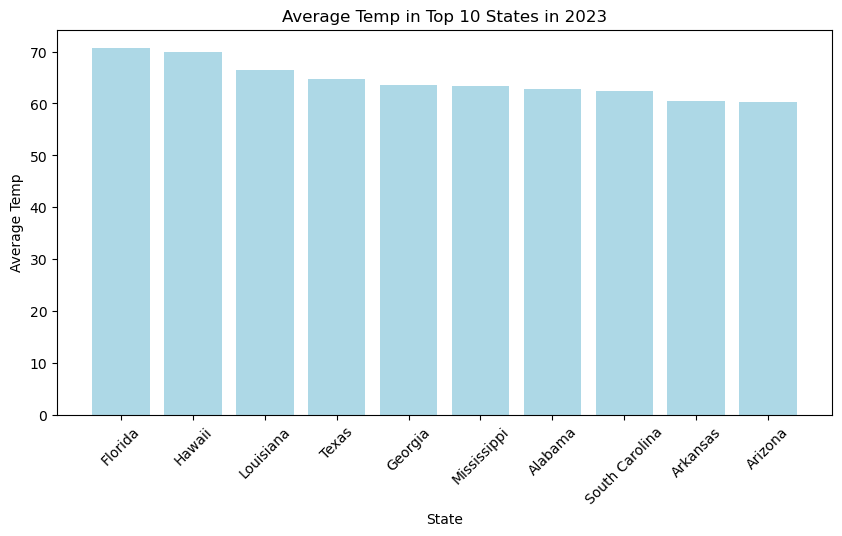

In [190]:
weather_graph = state_weather_rankings.sort_values(by='Average Temperature (°F)', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(weather_graph['State'], weather_graph['Average Temperature (°F)'], color='lightblue')
plt.xlabel('State')
plt.ylabel('Average Temp')
plt.title('Average Temp in Top 10 States in 2023')
plt.xticks(rotation=45)
plt.show()


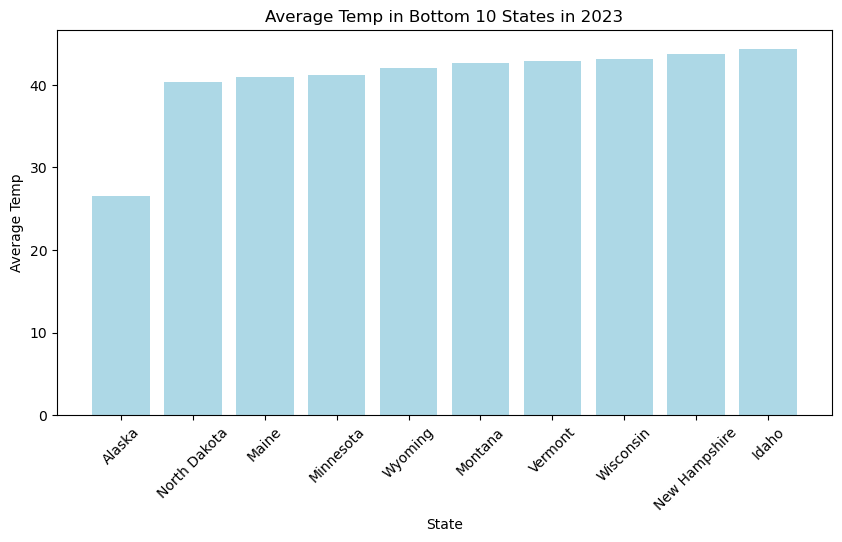

In [191]:
weather_graph_2 = state_weather_rankings.sort_values(by='Average Temperature (°F)', ascending=True).head(10)
plt.figure(figsize=(10, 5))
plt.bar(weather_graph_2['State'], weather_graph_2['Average Temperature (°F)'], color='lightblue')
plt.xlabel('State')
plt.ylabel('Average Temp')
plt.title('Average Temp in Bottom 10 States in 2023')
plt.xticks(rotation=45)
plt.show() 